This is the jupyter notebook for creating interactive machine learning pipeline

1. this part for loading necceseary self-made function

In [1]:
import sys
import sklearn.model_selection

sys.path.insert(0,"C:/Users/willy/Documents/GitHub/test-machine-learning/data_preparation")
sys.path.insert(0,"C:/Users/willy/Documents/GitHub/test-machine-learning/preprocessing")
sys.path.insert(0,"C:/Users/willy/Documents/GitHub/test-machine-learning/model")
import load_data
import data_description
import feature_target
import missing_value
import multi_decision_tree

2. this part contains mutiple self-made function for loading data and creating information of the data

In [2]:
# write the path of the data bellow
path=r"C:\Users\willy\Documents\Database\Kaggle\Melbourne Housing Snapshot\melb_data.csv"

# choose option of your data
# 1: only single file data
# 2: multiple data from folder
type_data=1


20 top rows
        Suburb              Address  Rooms Type      Price Method  SellerG  \
0   Abbotsford         85 Turner St      2    h  1480000.0      S   Biggin   
1   Abbotsford      25 Bloomburg St      2    h  1035000.0      S   Biggin   
2   Abbotsford         5 Charles St      3    h  1465000.0     SP   Biggin   
3   Abbotsford     40 Federation La      3    h   850000.0     PI   Biggin   
4   Abbotsford          55a Park St      4    h  1600000.0     VB   Nelson   
5   Abbotsford       129 Charles St      2    h   941000.0      S   Jellis   
6   Abbotsford         124 Yarra St      3    h  1876000.0      S   Nelson   
7   Abbotsford        98 Charles St      2    h  1636000.0      S   Nelson   
8   Abbotsford   6/241 Nicholson St      1    u   300000.0      S   Biggin   
9   Abbotsford        10 Valiant St      2    h  1097000.0      S   Biggin   
10  Abbotsford   411/8 Grosvenor St      2    u   700000.0     VB   Jellis   
11  Abbotsford      40 Nicholson St      3    h  13

C:\Users/willy/Documents/GitHub/test-machine-learning/data_preparation\data_description.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_value=unique_value.iloc[[2]].append(pandas.DataFrame(data=have_null,columns=['unique (with null)'],index=unique_value.columns.tolist()).transpose())
C:\Users/willy/Documents/GitHub/test-machine-learning/data_preparation\data_description.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  desc_info=desc_info.append([IQR,mode,unique_value])



data correlation between each column


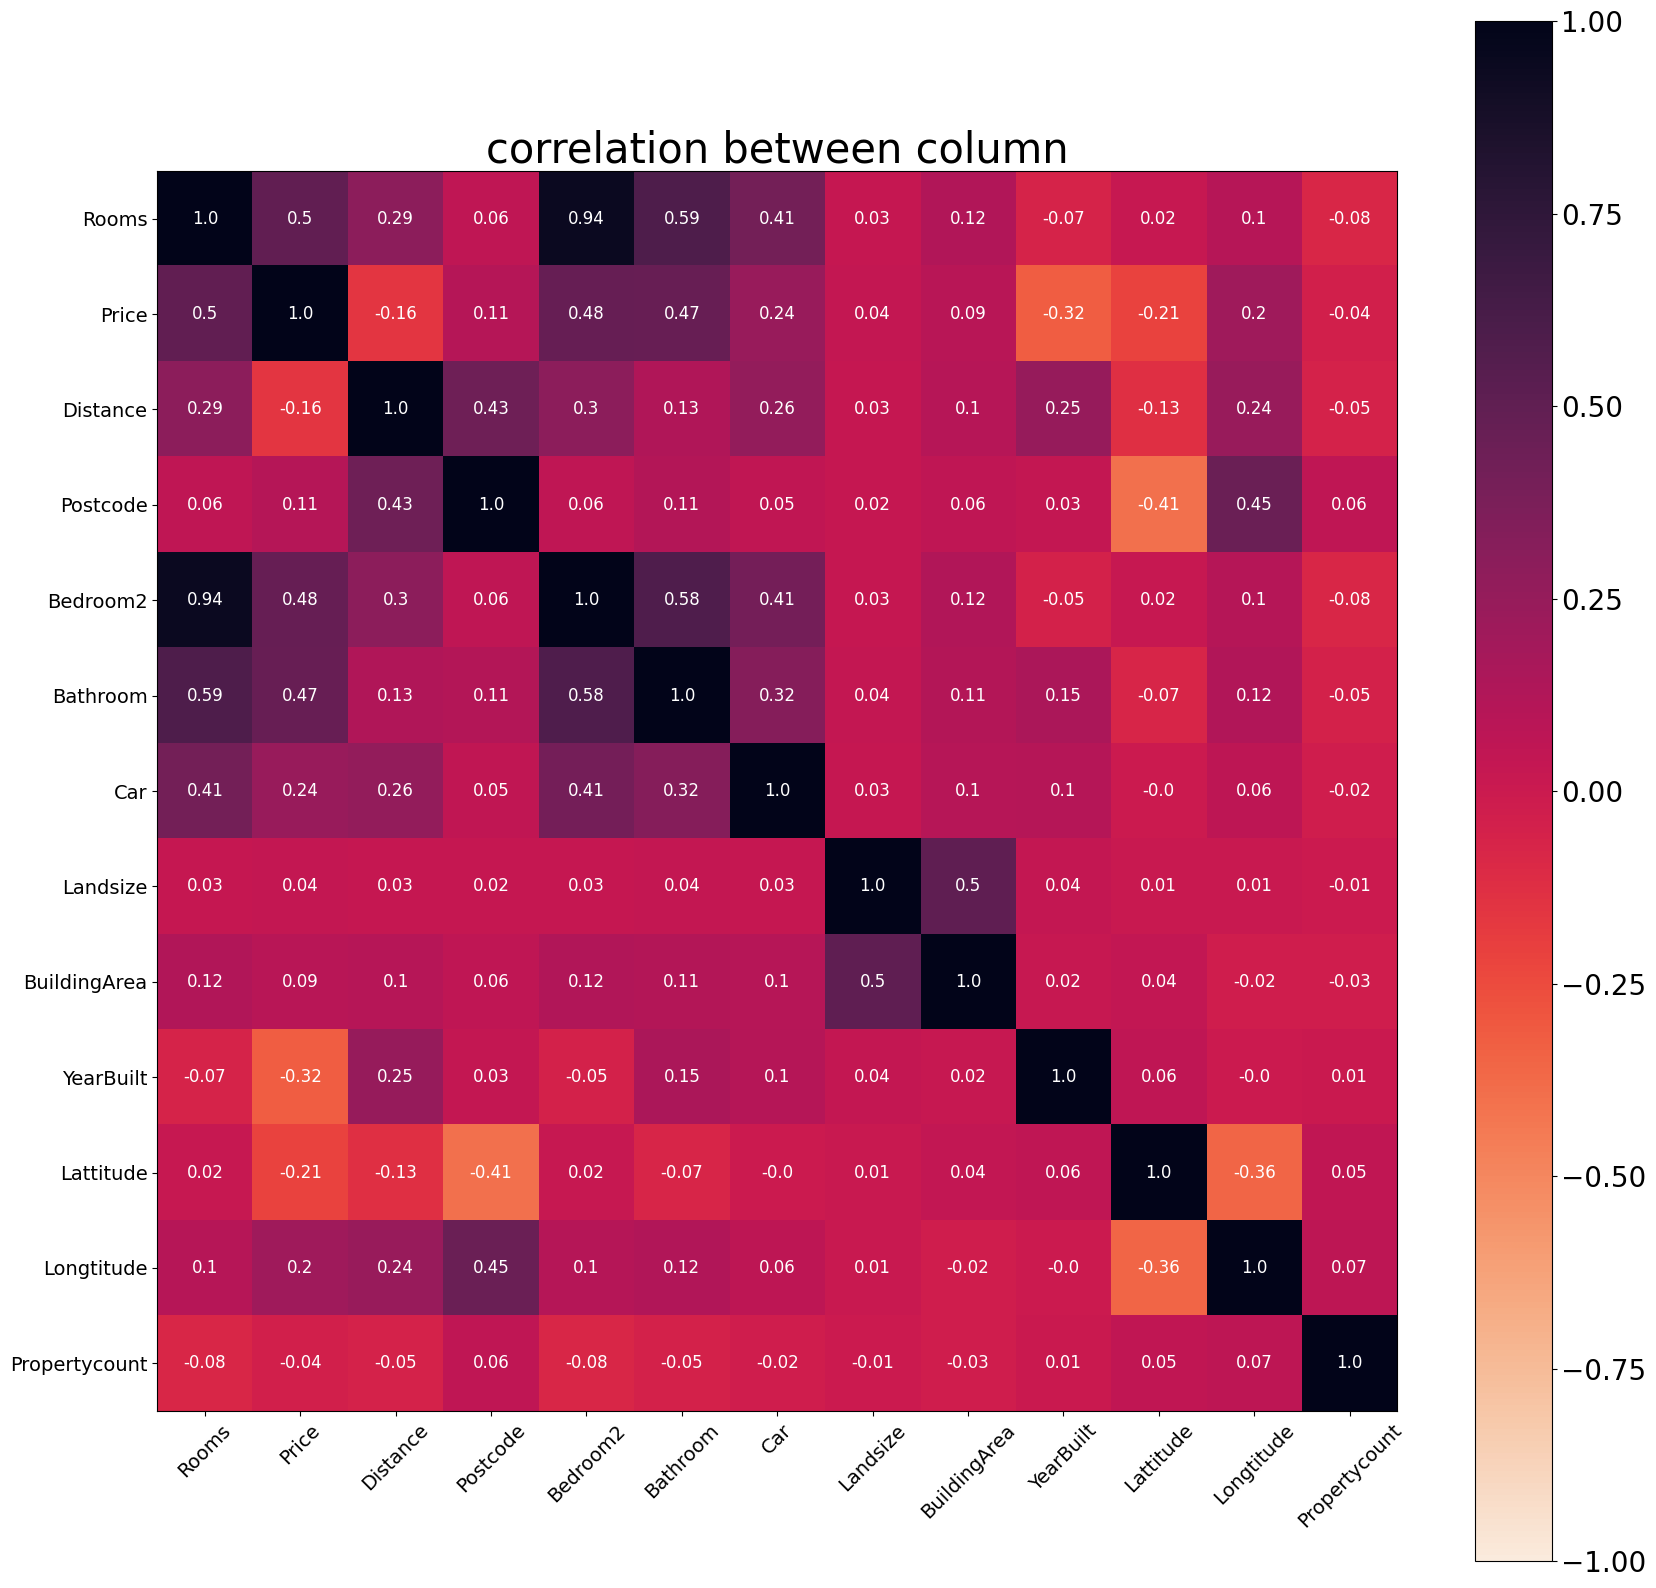

In [3]:
# loading data
data=load_data.load_data(path,type_data)

# data information
data_description.data_description_1(data)
data_description.data_description_2(data)


3. this part contains function for choosing feature and target. write inste the paranthesis([]) with double aposthrope and separated with comma. for example: "Rooms","Bedroom","Car"

In [6]:
# for data with int64 or float64 type
numerical_feature=["Rooms","Bedroom2","Bathroom","Car","Landsize","BuildingArea"]

# for categorical data with ordinality
ordinal_feature=["Type"]

# for categorical data without ordinality and <=10 categories
oh_feature=["Regionname"]

# for categorical data without ordinality and >10 categories
target_feature=["CouncilArea"]

# for data that will get predicted
target=["Price"]

In [7]:
# checking feature
nf=feature_target.numerical_feature(data,numerical_feature)
cf=feature_target.categorical_check(data,ordinal_feature,oh_feature,target_feature)
if len(cf)>0:
    feature=nf+cf
else:
    feature=nf

# processing feature
feature=data[feature]
target=data[target]

4. this part for dividing dataset into train set and test set

In [ ]:
# how you will divide the data. put the number of the option inside the paranthesis
# 1: random
# 2: determined by you
# 3: cross validation
split_type=[1]

# fill this variable if you choose option 2 or 3. write inside the paranthesis.
# 1. if you choose option 2, fill it with train set and test set. format (train set ratio,test set ratio)
# 2. if you choose option 3, fill it with how many fold you want the validation get done. format (number of fold)
ratio=[]